In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Image

import os, sys, re, datetime
from pathlib import Path

pj_dir = Path(os.getcwd()).parents[1]
data_dir = pj_dir/'data'
img_dir = pj_dir/'images'
src_dir = pj_dir/'src'
sys.path.append(str(src_dir))

from matplotlib import pyplot as plt
plt.style.use("bmh")
import numpy as np
import pandas as pd
import dask.dataframe as dd
from scipy import stats 
import sqlalchemy as  sa
from google.cloud import bigquery

from tqdm import tqdm
from dotenv import load_dotenv

(array([0, 3]),)
(array([2]),)
(array([1, 4]),)


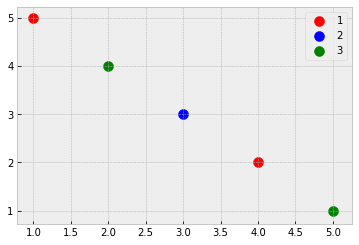

In [5]:
scatter_x = np.array([1,2,3,4,5])
scatter_y = np.array([5,4,3,2,1])
group = np.array([1,3,2,1,3])
cdict = {1: 'red', 2: 'blue', 3: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    print(ix)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

(array([0, 1, 2]),)
(array([3]),)


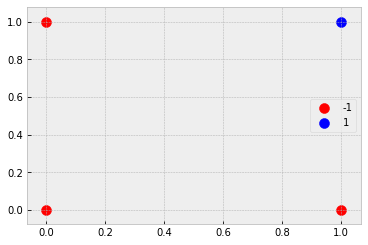

In [7]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([-1, -1, -1, 1])

cdict = {-1: 'red', 1: 'blue'}
fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    print(ix)
    ax.scatter(X[ix, 0], X[ix, 1],  c = cdict[g], label = g, s = 100)
ax.legend()

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
 
# use seaborn plotting defaults
import seaborn as sns; sns.set()

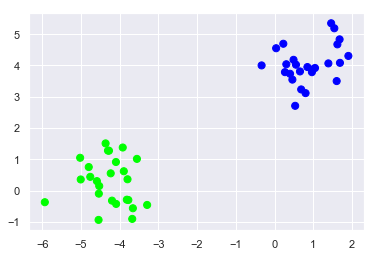

In [9]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=3, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg');

(-2, 6)

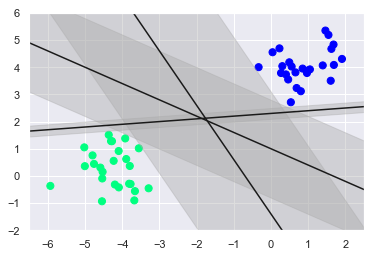

In [10]:
xfit = np.linspace(-6.5, 2.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
 
for m, b, d in [(0.1, 2.3, 0.2), (-0.6, 1, 1.8), (-2, -1.4, 4.5)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
 
plt.xlim(-6.5, 2.5)
plt.ylim(-2, 6)

In [11]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
 
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
 
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
 
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=500, linewidth=1, facecolors='red');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


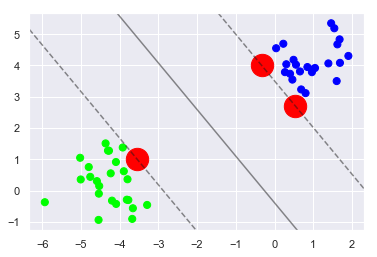

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg')
plot_svc_decision_function(model)

In [28]:
model.decision_function_shape

'ovr'

In [29]:
model.t 

array([[-0.38263691, -0.25691929]])

In [30]:
model.intercept_

array([-0.09885967])